<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/Regresi%C3%B3n_Lineal_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresiones Lineales

En este notebook haremos predicciones sobre precios de casas en Boston utilizando regresiones lineales y el optimizador SGD. 

Comenzamos por importar las librerías necesarias:

In [111]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

Ahora cargamos el dataset de Boston Housing, lo separamos en Features y Target, lo escalamos y dividimos en entrenamiento y prueba (en este caso, utilizamos un 15% de los datos como prueba):

In [112]:
boston = load_boston()
#X, y = boston.data, boston.target

print(boston.DESCR)

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["MEDV"] = boston.target

#Feature Matrix (todos los atributos)
#X = df.drop("MEDV",1)  

#Feature Matrix (sólo la cantidad de habitaciones)
X = df[["RM"]] 

#Target Variable
y = df["MEDV"]          

df.head()

#Con escalamiento
#X = scale(X)
#y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Ahora entrenamos el modelo (ajustamos la regresión) y sacamos tres métricas de error: R^2, MSE (error cuadrado promedio), RMSE (raíz del error cuadrado promedio)

In [113]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.1, n_iter_no_change = 5)
sgdr.fit(X_train, y_train)

#sgdr = LinearRegression()
#sgdr.fit(X_train, y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared: 0.25435407208851857
MSE:  53.99410688094468
RMSE:  7.348068241445821


Ahora podemos graficar las diferencias entre las predicciones y valores reales
Nota: los valores no corresponden a precios de casas, ya que han sido escalados y normalizados. Este gráfico indica, para cada punto en el eje x, cual fue la diferencia entre el valor real y la predicción, para dar una intuición de hacia donde estan las desviaciones:

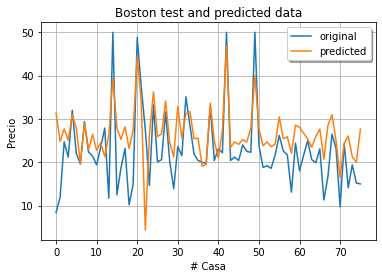

In [114]:
X_ax = range(len(y_test))
plt.plot(X_ax, y_test, label="original")
plt.plot(X_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('# Casa')
plt.ylabel('Precio')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 